In [2]:
import numpy as np


In [ ]:

def f(x):
    return x

def deriv(x):
    return 1

def spline(x, xi, xi_, fi, fi_, mi, mi_):
    h = xi-xi_    
    return (x-xi)*(x-xi)*(x-xi_)/(h*h) * mi_ + (x-xi_)*(x-xi_)*(x-xi)/(h*h) * mi + (x-xi)*  (x-xi)* (2*(x-xi_)+h)/(h*h*h) * fi_ - (x-xi_)*(x-xi_)*(2*(x-xi)-h)/(h*h*h) * fi_


In [ ]:
a = -1
b = 1
step = 0.01

nodes  = np.linspace(a, b, step)
Snodes = np.linspace(a, b, step)

for i in range(1,nodes):
    xi = nodes[i]
    xi_ = a - step
    fi  = f(xi)
    fi_ = f(xi_)
    mi  = deriv(xi)
    mi_ = deriv(xi_)
    for j in range(a,b,step/4):
        x = xi

    Snodes = spline(x, xi, xi_, fi, fi_, mi, mi_)


#потом будет сплайн с натяжением 

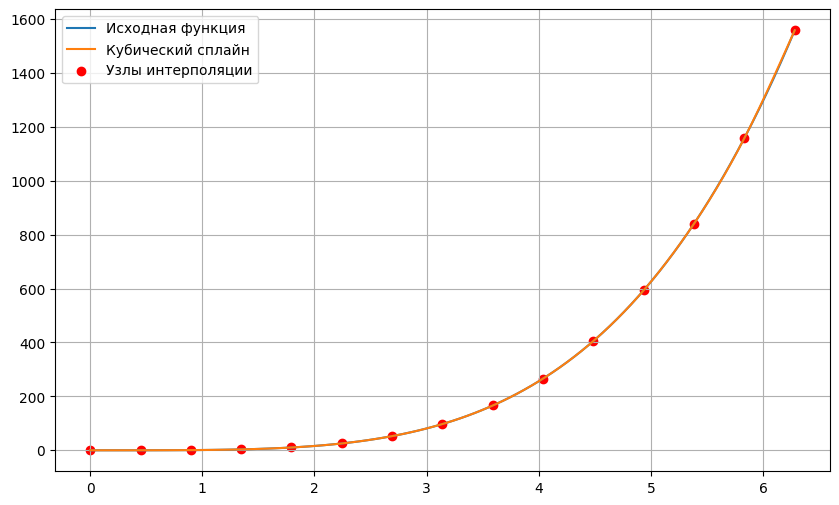

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_function_data(func, a, b, n_points, filename):
    """Генерирует файл с точками и значениями функции"""
    x = np.linspace(a, b, n_points)
    y = func(x)
    with open(filename, 'w') as f:
        for i in range(len(x)):
            f.write(f"{x[i]} {y[i]}\n")

def read_data(filename):
    """Читает данные из файла"""
    data = np.loadtxt(filename)
    x = data[:, 0]
    y = data[:, 1]
    return x, y

def tridiagonal_solve(A, d):
    """Решает трехдиагональную систему методом прогонки"""
    n = len(d)
    # Прямой ход
    for i in range(1, n):
        m = A[i][0] / A[i-1][1]
        A[i][1] -= m * A[i-1][2]
        d[i] -= m * d[i-1]
    # Обратный ход
    x = np.zeros(n)
    x[-1] = d[-1] / A[-1][1]
    for i in range(n-2, -1, -1):
        x[i] = (d[i] - A[i][2] * x[i+1]) / A[i][1]
    return x

def build_spline(x, y):
    """Строит кубический сплайн с естественными граничными условиями"""
    n = len(x) - 1
    h = np.diff(x)
    
    # Формирование трехдиагональной матрицы
    A = np.zeros((n-1, 3))
    d = np.zeros(n-1)
    
    for i in range(1, n):
        if i > 0:
            A[i-1][0] = h[i-1] / 6
        A[i-1][1] = (h[i-1] + h[i]) / 3
        if i < n:
            A[i-1][2] = h[i] / 6
        
        d[i-1] = (y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1]
    
    # Решение системы для M[1:n]
    M_inner = tridiagonal_solve(A, d)
    M = np.zeros(n+1)
    M[1:n] = M_inner  # Естественный сплайн: M[0] = M[n] = 0
    
    # Расчет коэффициентов сплайна
    coeffs = []
    for i in range(n):
        C1 = y[i] - M[i] * h[i]**2 / 6
        C2 = y[i+1] - M[i+1] * h[i]**2 / 6
        coeffs.append([x[i], x[i+1], y[i], y[i+1], M[i], M[i+1], h[i], C1, C2])
    
    return coeffs

def evaluate_spline(coeffs, x_val):
    """Вычисляет значение сплайна в точке x_val"""
    for c in coeffs:
        if c[0] <= x_val <= c[1]:
            h = c[6]
            t = (x_val - c[0]) / h
            return (
                c[4] * (c[1] - x_val)**3 / (6 * h) +
                c[5] * (x_val - c[0])**3 / (6 * h) +
                c[7] * (c[1] - x_val) / h +
                c[8] * (x_val - c[0]) / h
            )
    return None

if __name__ == "__main__":
    def f(x):
        # return np.sin(x)
        return x*x*x*x
         
    
    generate_function_data(f, 0, 2*np.pi, 15, "data.txt")
    
    x, y = read_data("data.txt")
    
    coeffs = build_spline(x, y)
    
    x_dense = np.linspace(x[0], x[-1], 100)
    y_dense = [evaluate_spline(coeffs, xi) for xi in x_dense]
    y_true = f(x_dense)
    
    with open("spline_result.txt", 'w') as f:
        for xi, yi in zip(x_dense, y_dense):
            f.write(f"{xi} {yi}\n")
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_dense, y_true, label="Исходная функция")
    plt.plot(x_dense, y_dense, label="Кубический сплайн")
    plt.scatter(x, y, color='red', label="Узлы интерполяции")
    plt.legend()
    plt.grid(True)
    plt.savefig("spline_comparison.png")
    plt.show()


Тестирование функции: x^2

=== Анализ точности для функции x^2 ===
Максимальная абсолютная ошибка: 1.98e-02
Максимальная относительная ошибка: nan
Средняя абсолютная ошибка: 2.39e-03
Средняя относительная ошибка: nan
log10(макс. абс. ошибки): -1.70


/var/folders/j7/ms50hmkx4sxgmqrwysp2jpgm0000gn/T/ipykernel_41064/1108286615.py:89: RuntimeWarning: invalid value encountered in divide
  relative_errors = np.abs((y_true - y_spline) / y_true)


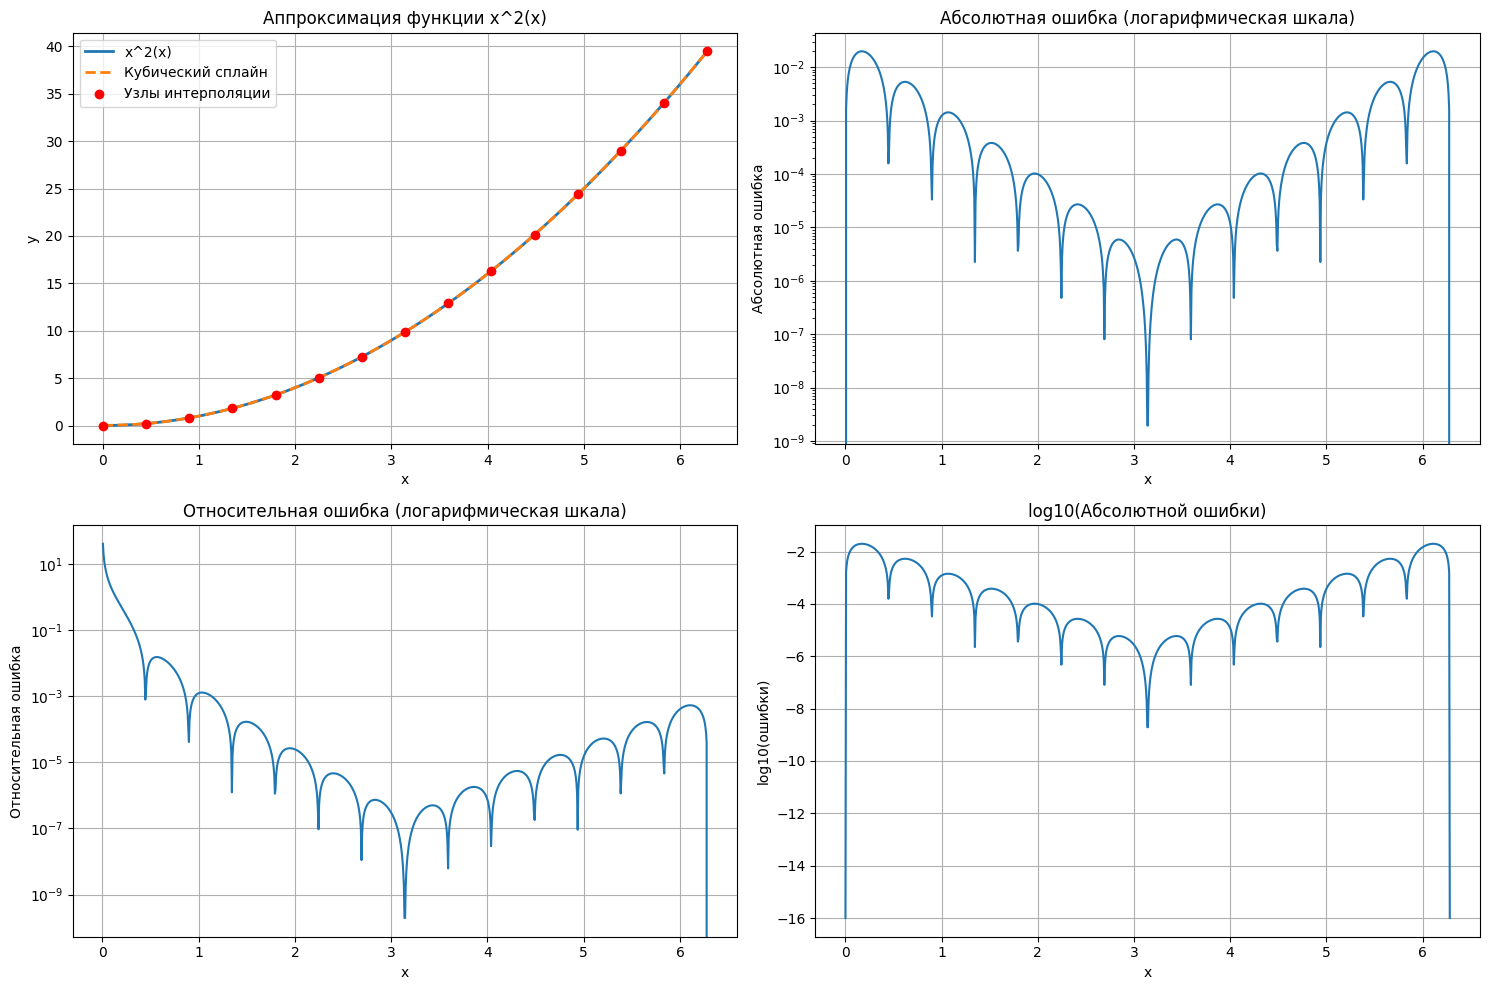


Тестирование функции: sin(x)

=== Анализ точности для функции sin(x) ===
Максимальная абсолютная ошибка: 1.11e-04
Максимальная относительная ошибка: nan
Средняя абсолютная ошибка: 3.87e-05
Средняя относительная ошибка: nan
log10(макс. абс. ошибки): -3.95


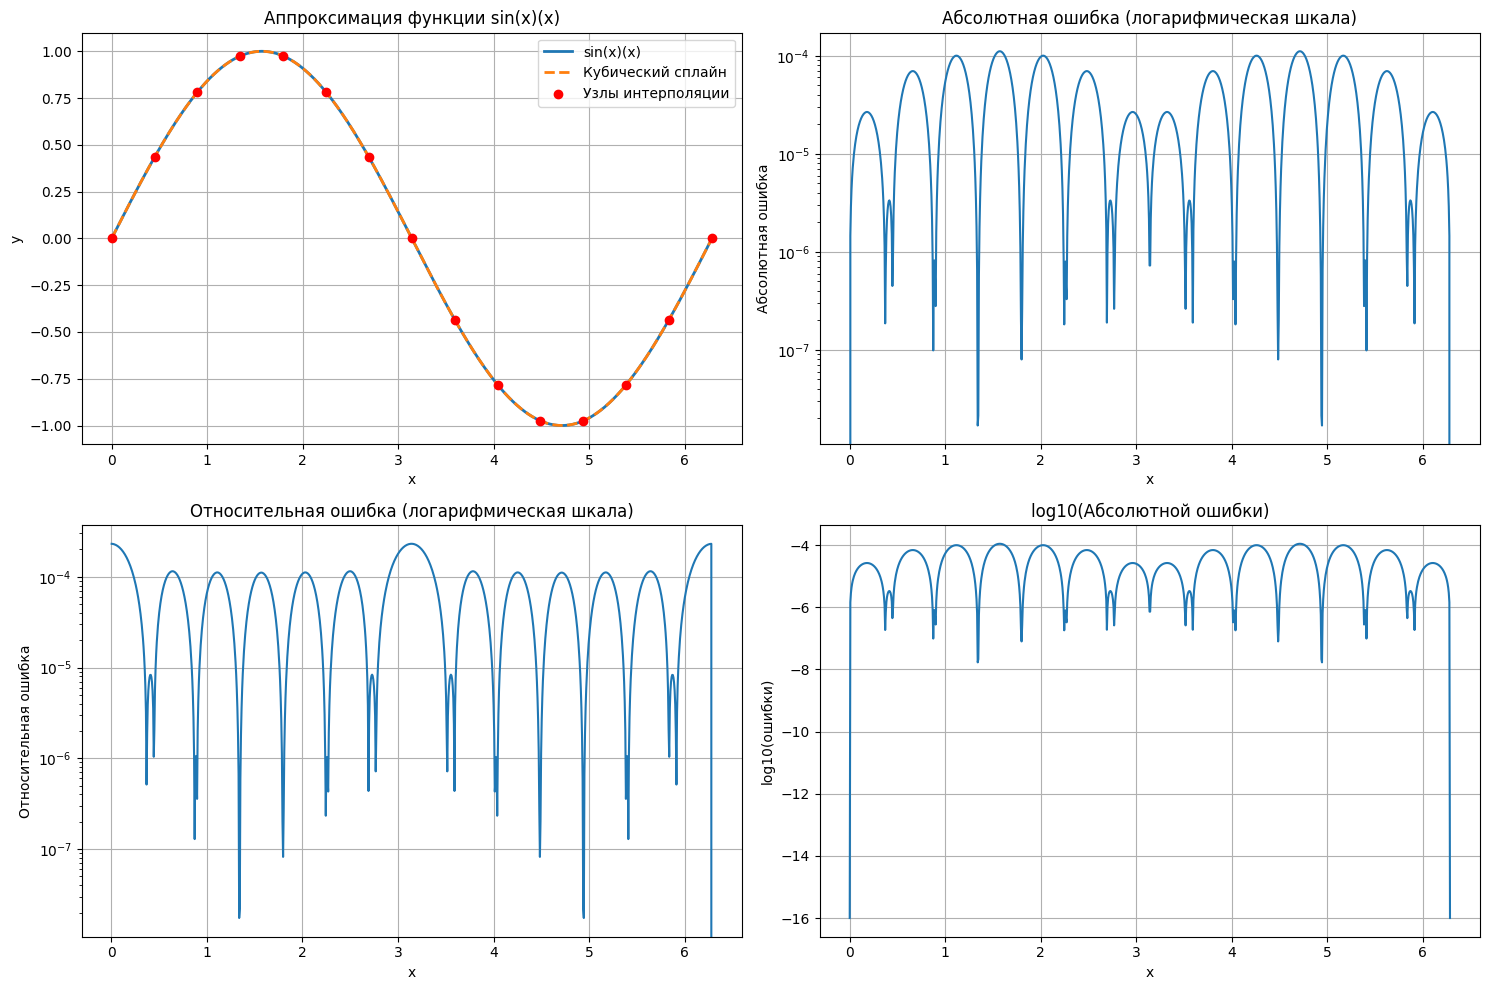


Тестирование функции: exp(x)

=== Анализ точности для функции exp(x) ===
Максимальная абсолютная ошибка: 5.17e+00
Максимальная относительная ошибка: 1.16e-02
Средняя абсолютная ошибка: 3.15e-01
Средняя относительная ошибка: 1.35e-03
log10(макс. абс. ошибки): 0.71


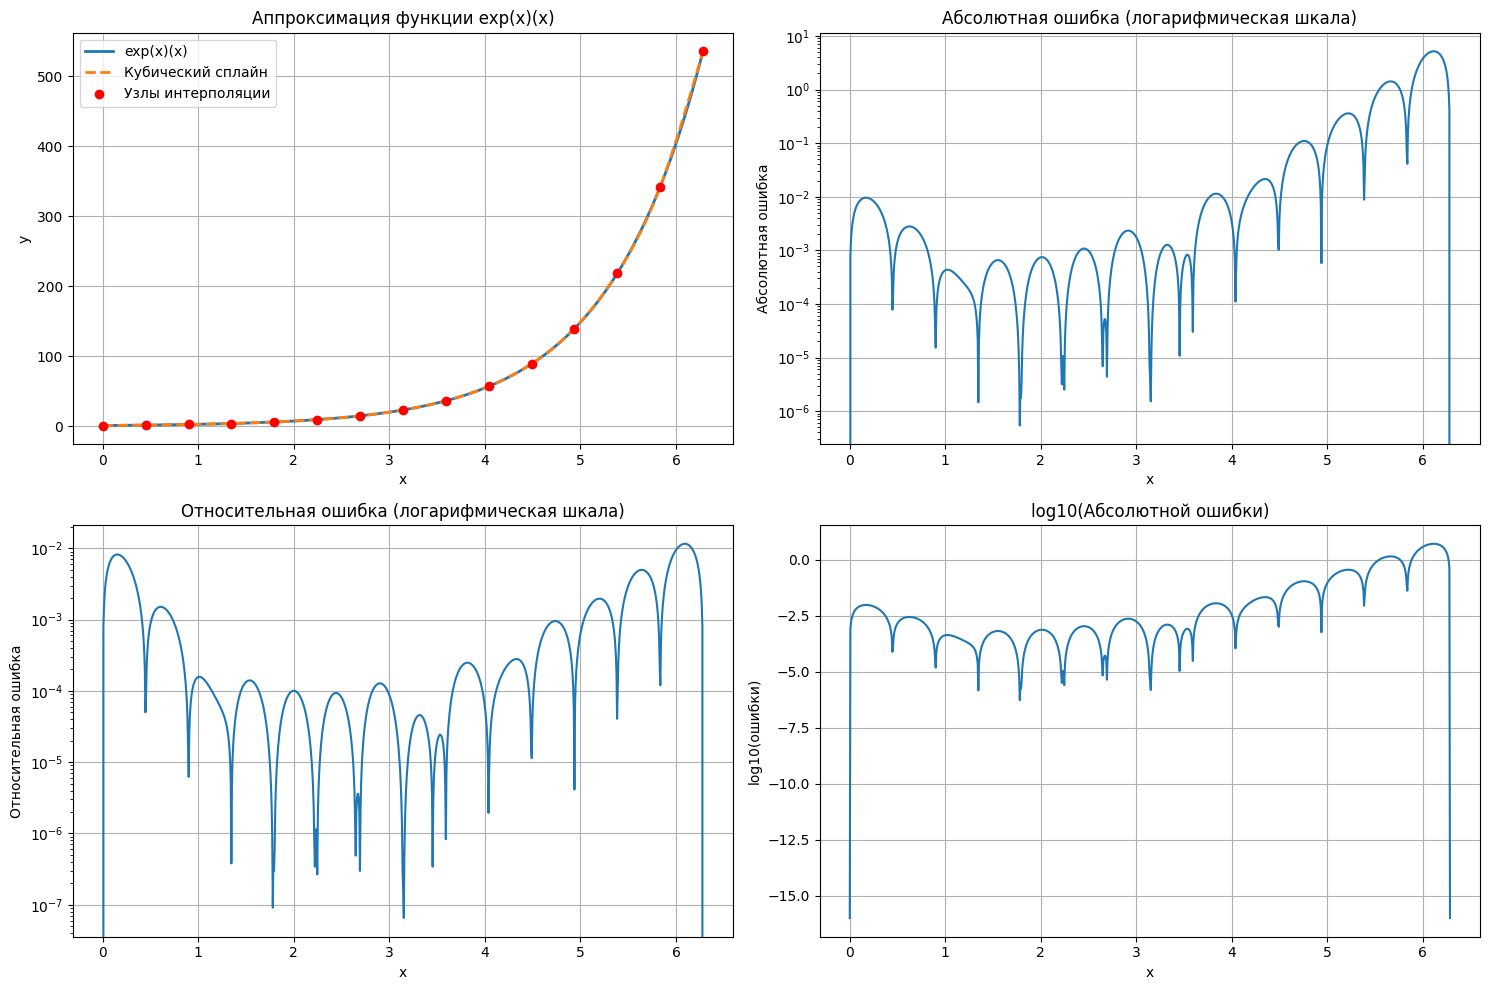


Тестирование функции: cos(5x)

=== Анализ точности для функции cos(5x) ===
Максимальная абсолютная ошибка: 4.15e-01
Максимальная относительная ошибка: 1.82e+02
Средняя абсолютная ошибка: 1.14e-01
Средняя относительная ошибка: 7.26e-01
log10(макс. абс. ошибки): -0.38


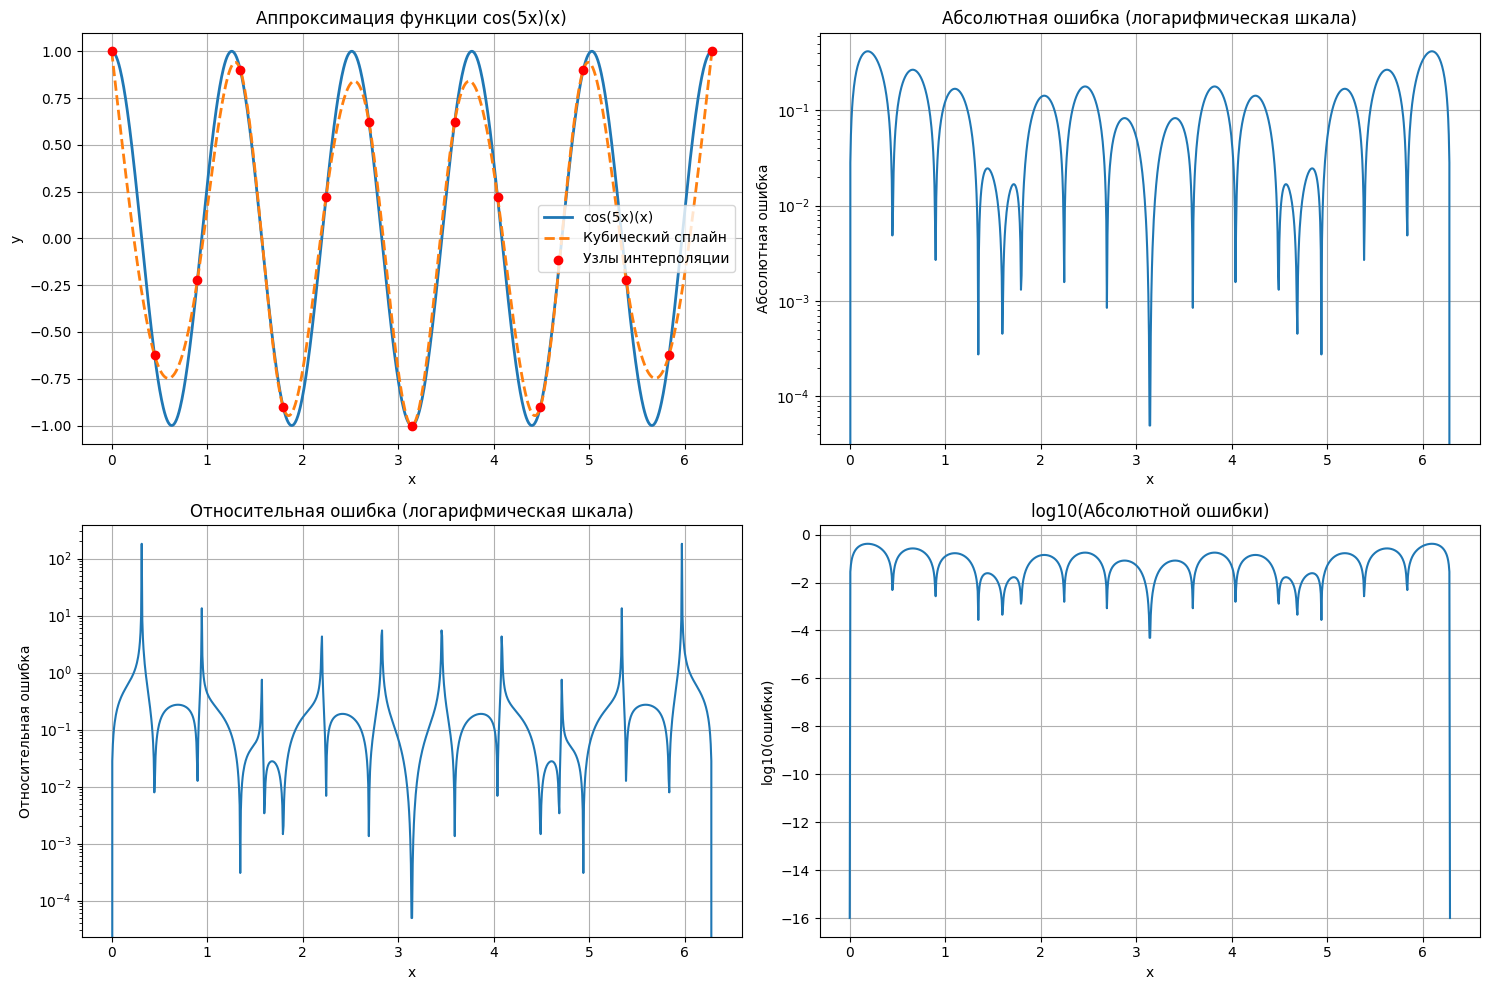


Тестирование функции: piecewise

=== Анализ точности для функции piecewise ===
Максимальная абсолютная ошибка: 3.73e-01
Максимальная относительная ошибка: nan
Средняя абсолютная ошибка: 2.26e-02
Средняя относительная ошибка: nan
log10(макс. абс. ошибки): -0.43


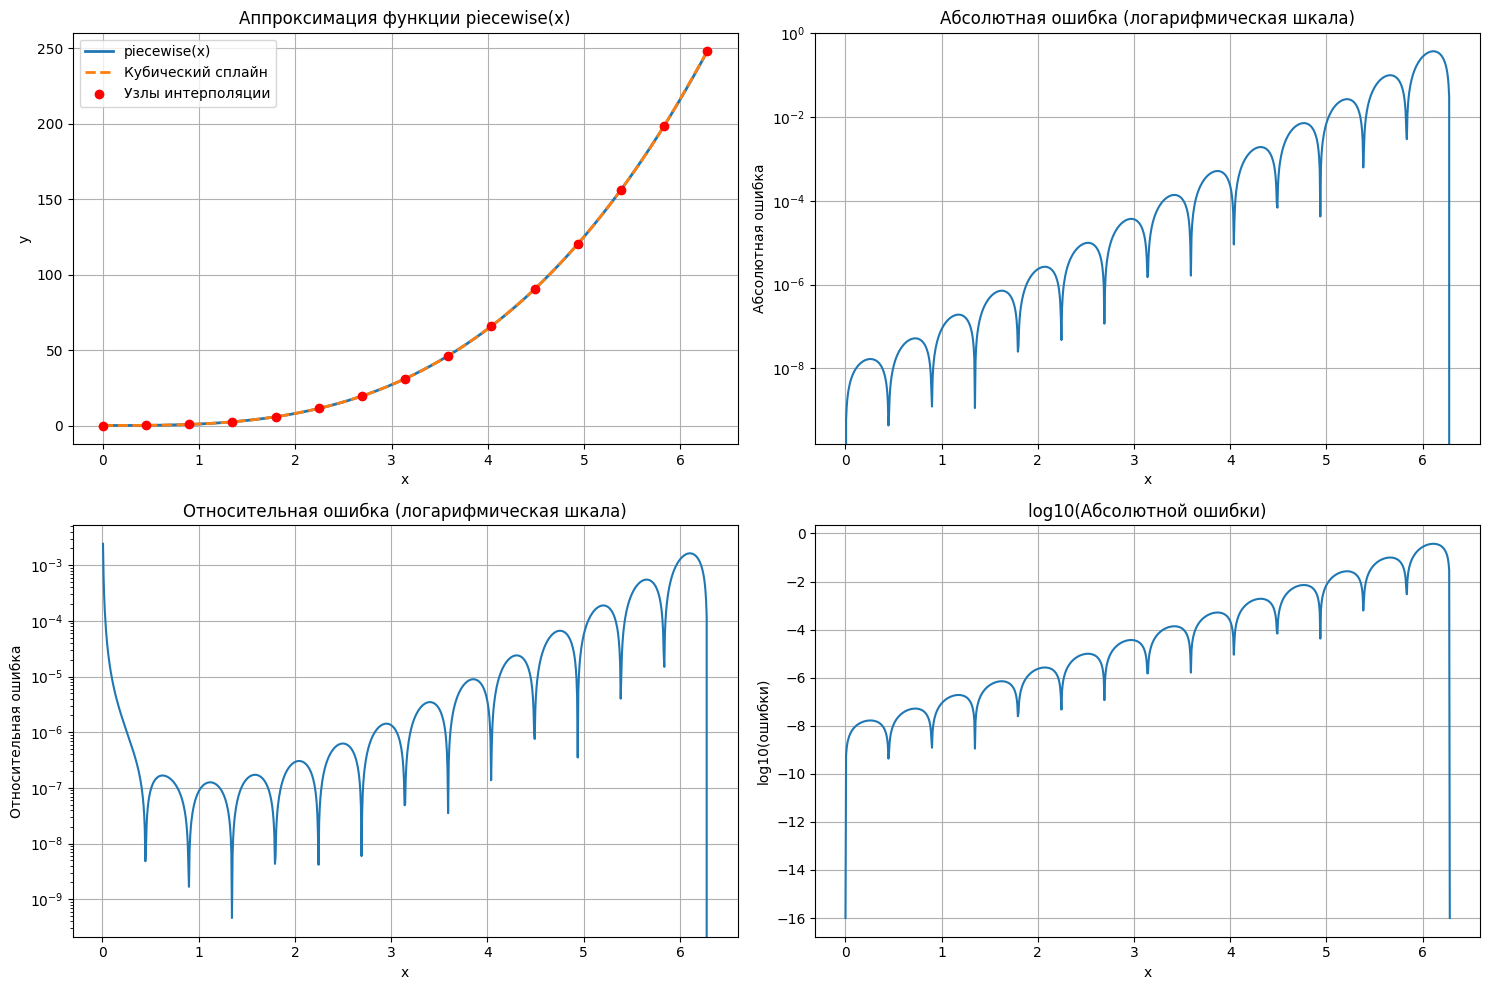


СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
Функция		Макс. абс. ошибка	log10(ошибки)
------------------------------------------------------------
x^2         	1.98e-02		 -1.70
sin(x)      	1.11e-04		 -3.95
exp(x)      	5.17e+00		  0.71
cos(5x)     	4.15e-01		 -0.38
piecewise   	3.73e-01		 -0.43


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_function_data(func, a, b, n_points, filename):
    """Генерирует файл с точками и значениями функции"""
    x = np.linspace(a, b, n_points)
    y = func(x)
    with open(filename, 'w') as f:
        for i in range(len(x)):
            f.write(f"{x[i]} {y[i]}\n")
    return x, y

def read_data(filename):
    """Читает данные из файла"""
    data = np.loadtxt(filename)
    x = data[:, 0]
    y = data[:, 1]
    return x, y

def tridiagonal_solve(A, d):
    """Решает трехдиагональную систему методом прогонки"""
    n = len(d)
    # Прямой ход
    for i in range(1, n):
        m = A[i][0] / A[i-1][1]
        A[i][1] -= m * A[i-1][2]
        d[i] -= m * d[i-1]
    # Обратный ход
    x = np.zeros(n)
    x[-1] = d[-1] / A[-1][1]
    for i in range(n-2, -1, -1):
        x[i] = (d[i] - A[i][2] * x[i+1]) / A[i][1]
    return x

def build_spline(x, y):
    """Строит кубический сплайн с естественными граничными условиями"""
    n = len(x) - 1
    h = np.diff(x)
    
    # Формирование трехдиагональной матрицы
    A = np.zeros((n-1, 3))
    d = np.zeros(n-1)
    
    for i in range(1, n):
        if i > 0:
            A[i-1][0] = h[i-1] / 6
        A[i-1][1] = (h[i-1] + h[i]) / 3
        if i < n:
            A[i-1][2] = h[i] / 6
        
        d[i-1] = (y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1]
    
    # Решение системы для M[1:n]
    M_inner = tridiagonal_solve(A, d)
    M = np.zeros(n+1)
    M[1:n] = M_inner  # Естественный сплайн: M[0] = M[n] = 0
    
    # Расчет коэффициентов сплайна
    coeffs = []
    for i in range(n):
        C1 = y[i] - M[i] * h[i]**2 / 6
        C2 = y[i+1] - M[i+1] * h[i]**2 / 6
        coeffs.append([x[i], x[i+1], y[i], y[i+1], M[i], M[i+1], h[i], C1, C2])
    
    return coeffs

def evaluate_spline(coeffs, x_val):
    """Вычисляет значение сплайна в точке x_val"""
    for c in coeffs:
        if c[0] <= x_val <= c[1]:
            h = c[6]
            t = (x_val - c[0]) / h
            return (
                c[4] * (c[1] - x_val)**3 / (6 * h) +
                c[5] * (x_val - c[0])**3 / (6 * h) +
                c[7] * (c[1] - x_val) / h +
                c[8] * (x_val - c[0]) / h
            )
    return None

def analyze_accuracy(func, coeffs, x_test, function_name):
    """Анализирует точность приближения в экспоненциальной форме"""
    y_true = func(x_test)
    y_spline = np.array([evaluate_spline(coeffs, xi) for xi in x_test])
    
    # Вычисление ошибок
    absolute_errors = np.abs(y_true - y_spline)
    relative_errors = np.abs((y_true - y_spline) / y_true)
    
    # Статистика ошибок
    max_abs_error = np.max(absolute_errors)
    max_rel_error = np.max(relative_errors)
    mean_abs_error = np.mean(absolute_errors)
    mean_rel_error = np.mean(relative_errors)
    
    # Экспоненциальная форма (логарифм ошибки)
    log_abs_errors = np.log10(absolute_errors + 1e-16)  # +1e-16 чтобы избежать log(0)
    log_rel_errors = np.log10(relative_errors + 1e-16)
    
    print(f"\n=== Анализ точности для функции {function_name} ===")
    print(f"Максимальная абсолютная ошибка: {max_abs_error:.2e}")
    print(f"Максимальная относительная ошибка: {max_rel_error:.2e}")
    print(f"Средняя абсолютная ошибка: {mean_abs_error:.2e}")
    print(f"Средняя относительная ошибка: {mean_rel_error:.2e}")
    print(f"log10(макс. абс. ошибки): {np.log10(max_abs_error + 1e-16):.2f}")
    
    return {
        'x_test': x_test,
        'y_true': y_true,
        'y_spline': y_spline,
        'absolute_errors': absolute_errors,
        'relative_errors': relative_errors,
        'log_abs_errors': log_abs_errors,
        'log_rel_errors': log_rel_errors,
        'stats': {
            'max_abs': max_abs_error,
            'max_rel': max_rel_error,
            'mean_abs': mean_abs_error,
            'mean_rel': mean_rel_error
        }
    }

def plot_results(x, y, coeffs, accuracy_data, function_name):
    """Строит графики функции, сплайна и ошибок"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # График 1: Функция и сплайн
    ax1.plot(accuracy_data['x_test'], accuracy_data['y_true'], 
             label=f'{function_name}(x)', linewidth=2)
    ax1.plot(accuracy_data['x_test'], accuracy_data['y_spline'], 
             '--', label='Кубический сплайн', linewidth=2)
    ax1.scatter(x, y, color='red', label='Узлы интерполяции', zorder=5)
    ax1.set_title(f'Аппроксимация функции {function_name}(x)')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.legend()
    ax1.grid(True)
    
    # График 2: Абсолютная ошибка
    ax2.semilogy(accuracy_data['x_test'], accuracy_data['absolute_errors'])
    ax2.set_title('Абсолютная ошибка (логарифмическая шкала)')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Абсолютная ошибка')
    ax2.grid(True)
    
    # График 3: Относительная ошибка
    ax3.semilogy(accuracy_data['x_test'], accuracy_data['relative_errors'])
    ax3.set_title('Относительная ошибка (логарифмическая шкала)')
    ax3.set_xlabel('x')
    ax3.set_ylabel('Относительная ошибка')
    ax3.grid(True)
    
    # График 4: Логарифм ошибки
    ax4.plot(accuracy_data['x_test'], accuracy_data['log_abs_errors'])
    ax4.set_title('log10(Абсолютной ошибки)')
    ax4.set_xlabel('x')
    ax4.set_ylabel('log10(ошибки)')
    ax4.grid(True)
    
    plt.tight_layout()
    plt.savefig(f'spline_analysis_{function_name}.png', dpi=300)
    plt.show()

# Тестовые функции для анализа
def test_function_1(x):
    """x^2 - должна точно восстанавливаться"""
    return x**2

def test_function_2(x):
    """sin(x) - гладкая функция"""
    return np.sin(x)

def test_function_3(x):
    """exp(x) - быстро растущая функция"""
    return np.exp(x)

def test_function_4(x):
    """cos(5x) - осциллирующая функция"""
    return np.cos(5*x)

def test_function_5(x):
    """Функция с разрывом второй производной"""
    return np.where(x < 0, x**2, x**3)

# Основная программа
if __name__ == "__main__":
    # Параметры
    a, b = 0, 2*np.pi
    n_points = 15
    n_test_points = 1000
    
    # Список тестовых функций
    test_functions = [
        (test_function_1, "x^2"),
        (test_function_2, "sin(x)"),
        (test_function_3, "exp(x)"),
        (test_function_4, "cos(5x)"),
        (test_function_5, "piecewise")
    ]
    
    results = []
    
    for func, name in test_functions:
        print(f"\n{'='*50}")
        print(f"Тестирование функции: {name}")
        print(f"{'='*50}")
        
        # 1. Генерация данных
        filename = f"data_{name.replace('^', '').replace('(', '').replace(')', '')}.txt"
        x, y = generate_function_data(func, a, b, n_points, filename)
        
        # 2. Построение сплайна
        coeffs = build_spline(x, y)
        
        # 3. Тестирование на плотной сетке
        x_test = np.linspace(a, b, n_test_points)
        accuracy_data = analyze_accuracy(func, coeffs, x_test, name)
        
        # 4. Сохранение результатов
        results.append((name, coeffs, accuracy_data))
        
        # 5. Построение графиков для каждой функции
        plot_results(x, y, coeffs, accuracy_data, name)
        
        # 6. Сохранение данных в файл
        with open(f"spline_results_{name}.txt", 'w') as f:
            f.write(f"Функция: {name}\n")
            f.write(f"Узлы интерполяции: {n_points}\n")
            f.write(f"Статистика ошибок:\n")
            for key, value in accuracy_data['stats'].items():
                f.write(f"  {key}: {value:.2e}\n")
            f.write("\nДетальные данные:\n")
            f.write("x\tИстинное значение\tЗначение сплайна\tАбс. ошибка\tОтн. ошибка\n")
            for i in range(min(100, len(x_test))):  # Сохраняем первые 100 точек
                f.write(f"{x_test[i]:.6f}\t{accuracy_data['y_true'][i]:.6f}\t"
                       f"{accuracy_data['y_spline'][i]:.6f}\t"
                       f"{accuracy_data['absolute_errors'][i]:.2e}\t"
                       f"{accuracy_data['relative_errors'][i]:.2e}\n")
    
    # Сводная таблица результатов
    print(f"\n{'='*60}")
    print("СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
    print(f"{'='*60}")
    print("Функция\t\tМакс. абс. ошибка\tlog10(ошибки)")
    print("-" * 60)
    
    for name, _, accuracy_data in results:
        max_error = accuracy_data['stats']['max_abs']
        log_error = np.log10(max_error + 1e-16)
        print(f"{name:12}\t{max_error:.2e}\t\t{log_error:6.2f}")